In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
!pip install kmodes
from kmodes.kmodes import KModes

In [8]:
df = pd.read_csv('data_set/housing_prediction.csv')

In [9]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [11]:
suburb = df[['Suburb']]
suburb

,Suburb
0,Abbotsford
1,Abbotsford
2,Abbotsford
3,Abbotsford
4,Abbotsford
...,...
34852,Yarraville
34853,Yarraville
34854,Yarraville
34855,Yarraville


In [12]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [19]:
cost = []
for i in range(1,10):
    cluster = KModes(n_clusters=i)
    cluster.fit(suburb)
    cost.append(cluster.cost_)

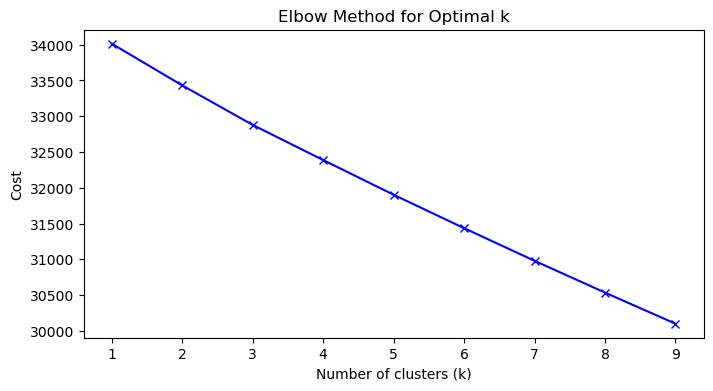

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,10), cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 350.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 350.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

Run 1, iteration: 1/100, moves: 0, cost: 337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 337.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 336.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 336.0
Init: initializing centroids
Init: initial

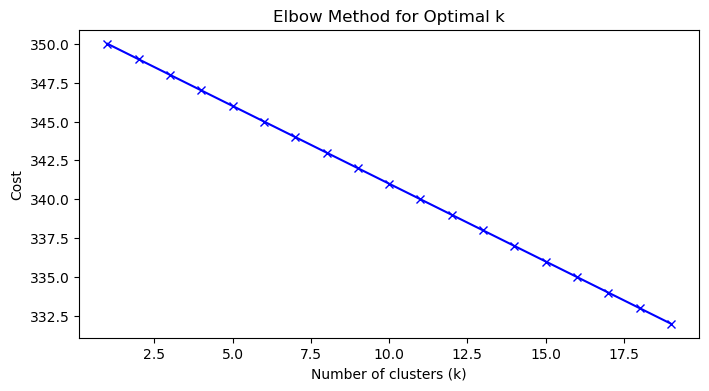

In [22]:
cluster_labels = cluster.labels_

In [23]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

# example for kmode

In [25]:
def generate_categorical_data(num_rows, num_cols):
  data = []
  for _ in range(num_rows):
    row = []
    for _ in range(num_cols):
      # Generate random categorical values (adjust as needed)
      value = np.random.choice(['A', 'B', 'C', 'D', 'E','F','H','I','J','K'])
      row.append(value)
    data.append(row)

  df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(num_cols)])
  return df

# Generate a dataset with 250 rows and 5 categorical columns
df = generate_categorical_data(250, 5)
df

,col_0,col_1,col_2,col_3,col_4
0,J,C,H,K,D
1,B,J,F,B,B
2,C,E,E,K,F
3,A,H,K,K,A
4,I,C,E,C,E
...,...,...,...,...,...
245,A,F,J,A,E
246,B,A,B,D,F
247,F,I,I,C,B
248,J,J,A,K,F


In [29]:
# Introduce some patterns for potential clusters (optional)
df.loc[:100, 'col_0'] = 'A'
df.loc[101:200, 'col_1'] = 'B'
df.loc[201:, 'col_2'] = 'C'
df

,col_0,col_1,col_2,col_3,col_4,cluster
0,A,C,H,K,D,0
1,A,J,F,B,B,0
2,A,E,E,K,F,2
3,A,H,K,K,A,0
4,A,C,E,C,E,1
...,...,...,...,...,...,...
245,A,F,C,A,E,0
246,B,A,C,D,F,0
247,F,I,C,C,B,0
248,J,J,C,K,F,0


In [27]:
# Create a K-Modes model
kmode = KModes(n_clusters=3, init='Huang', verbose=1)

# Fit the model to the data
clusters = kmode.fit_predict(df)

# Add cluster labels to the DataFrame
df['cluster'] = clusters


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 74, cost: 801.0
Run 1, iteration: 2/100, moves: 3, cost: 801.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 54, cost: 797.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 55, cost: 787.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 58, cost: 818.0
Run 4, iteration: 2/100, moves: 6, cost: 818.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 42, cost: 813.0
Run 5, iteration: 2/100, moves: 20, cost: 813.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 64, cost: 796.0
Run 6, iteration: 2/100, moves: 3, cost: 796.0
Init: initializing centroids
Init: initiali

In [28]:
df

,col_0,col_1,col_2,col_3,col_4,cluster
0,A,C,H,K,D,0
1,A,J,F,B,B,0
2,A,E,E,K,F,2
3,A,H,K,K,A,0
4,A,C,E,C,E,1
...,...,...,...,...,...,...
245,A,F,C,A,E,0
246,B,A,C,D,F,0
247,F,I,C,C,B,0
248,J,J,C,K,F,0


In [30]:
df['cluster'].unique()

array([0, 2, 1], dtype=uint16)

In [41]:
costs = []
for i in range(1, 10):
    km = KModes(n_clusters=i)
    km.fit(df)
    costs.append(km.cost_)
print(costs)


[972.0, 926.0, 901.0, 854.0, 831.0, 809.0, 797.0, 785.0, 712.0]


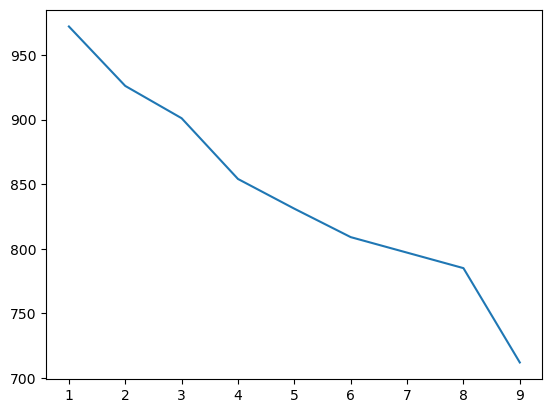

In [42]:
plt.plot(range(1,10),costs)